In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas pyarrow great_expectations ydata-profiling openpyxl sqlite-utils streamlit schedule localtunnel

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.9 python3.9-distutils python3.9-dev -y

In [ ]:
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3.9
!python3.9 -m pip install virtualenv
!python3.9 -m virtualenv /usr/local/envs/ge-env --python=python3.9

In [ ]:
import sys
sys.path.append('/usr/local/envs/ge-env/lib/python3.9/site-packages')

!source /usr/local/envs/ge-env/bin/activate && \
    pip install great_expectations==0.16.8 pandas pyarrow

In [40]:
!python3.9 --version

Python 3.9.23


In [41]:
import sys
sys.path.append('/usr/local/envs/ge-env/lib/python3.9/site-packages')

In [42]:
!/usr/local/envs/ge-env/bin/python3.9 -m pip show great_expectations

Name: great-expectations
Version: 0.16.8
Summary: Always know what to expect from your data.
Home-page: https://github.com/great-expectations/great_expectations
Author: The Great Expectations Team
Author-email: team@greatexpectations.io
License: Apache-2.0
Location: /usr/local/envs/ge-env/lib/python3.9/site-packages
Requires: altair, Click, colorama, cryptography, importlib-metadata, Ipython, ipywidgets, jinja2, jsonpatch, jsonschema, makefun, marshmallow, mistune, nbformat, notebook, numpy, packaging, pandas, pydantic, pyparsing, python-dateutil, pytz, requests, ruamel.yaml, scipy, tqdm, typing-extensions, tzlocal, urllib3
Required-by: 


In [ ]:
!/usr/local/envs/ge-env/bin/python3.9 -m pip uninstall -y pandas numpy
!/usr/local/envs/ge-env/bin/python3.9 -m pip install numpy==1.23.5 pandas==1.5.3

In [44]:
!/usr/local/envs/ge-env/bin/python3.9 -c "import pandas; import numpy; import great_expectations; print('✅ All imports successful!')"

✅ All imports successful!


In [ ]:
# %cd /content/drive/MyDrive/data_governance_project
# ! /usr/local/envs/ge-env/bin/great_expectations init

In [45]:
init_script = """
import os
import great_expectations as ge
from great_expectations.data_context.types.base import DataContextConfig
from great_expectations.data_context import BaseDataContext

project_path = "/content/drive/MyDrive/data_governance_project"
ge_path = os.path.join(project_path, "great_expectations")
os.makedirs(ge_path, exist_ok=True)

config = DataContextConfig(
    config_version=3,
    plugins_directory="plugins/",
    expectations_store_name="expectations_store",
    validations_store_name="validations_store",
    checkpoint_store_name="checkpoint_store",
    data_docs_sites={
        "local_site": {
            "class_name": "SiteBuilder",
            "store_backend": {
                "class_name": "TupleFilesystemStoreBackend",
                "base_directory": "uncommitted/data_docs/"
            },
            "site_index_builder": {
                "class_name": "DefaultSiteIndexBuilder"
            }
        }
    },
    stores={
        "expectations_store": {
            "class_name": "ExpectationsStore",
            "store_backend": {
                "class_name": "TupleFilesystemStoreBackend",
                "base_directory": "expectations/"
            }
        },
        "validations_store": {
            "class_name": "ValidationsStore",
            "store_backend": {
                "class_name": "TupleFilesystemStoreBackend",
                "base_directory": "validations/"
            }
        },
        "checkpoint_store": {
            "class_name": "CheckpointStore",
            "store_backend": {
                "class_name": "TupleFilesystemStoreBackend",
                "base_directory": "checkpoints/"
            }
        }
    }
)

context = BaseDataContext(project_config=config, context_root_dir=ge_path)
print("✅ GE initialized via Python 3.9 subprocess.")
"""

with open("/content/ge_init.py", "w") as f:
    f.write(init_script)

print("📄 Initialization script saved to /content/ge_init.py")

📄 Initialization script saved to /content/ge_init.py


In [46]:
!/usr/local/envs/ge-env/bin/python3.9 /content/ge_init.py

✅ GE initialized via Python 3.9 subprocess.


## Step 1: Project Folder Setup (on Google Drive)

In [47]:
from google.colab import drive
import os

# Mount your Drive
drive.mount('/content/drive')

# Define base project path
base_path = '/content/drive/MyDrive/data_governance_project'

# Define subfolders
folders = [
    'data_lake/raw/year=2023/month=07',
    'ingestion',
    'quality',
    'profiling',
    'catalog',
    'logs',
    'reports'
]

# Create folders
for folder in folders:
    path = os.path.join(base_path, folder)
    os.makedirs(path, exist_ok=True)

print("✅ Project directory structure created.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Project directory structure created.


In [ ]:
!pip install faker

In [49]:
# Define project base path
base_path = '/content/drive/MyDrive/data_governance_project'
ingestion_path = os.path.join(base_path, 'ingestion')

# Ensure the folder exists
os.makedirs(ingestion_path, exist_ok=True)
print("✅ ingestion_path ready:", ingestion_path)

✅ ingestion_path ready: /content/drive/MyDrive/data_governance_project/ingestion


In [50]:
from faker import Faker
import pandas as pd
import random

fake = Faker()
num_customers = 5000

customer_data = []
for i in range(1, num_customers + 1):
    customer_data.append({
        "customer_id": i,
        "name": fake.name(),
        "email": fake.email(),
        "age": random.randint(18, 75)
    })

customer_df = pd.DataFrame(customer_data)
customer_df.to_csv(os.path.join(ingestion_path, "customer.csv"), index=False)
print("✅ customer.csv created.")

✅ customer.csv created.


In [51]:
num_products = 200
product_data = []

for i in range(101, 101 + num_products):
    product_data.append({
        "product_id": i,
        "name": fake.word().capitalize() + " " + fake.word().capitalize(),
        "price": round(random.uniform(5, 500), 2)
    })

product_df = pd.DataFrame(product_data)
product_df.to_excel(os.path.join(ingestion_path, "product.xlsx"), index=False)
print("✅ product.xlsx created.")

✅ product.xlsx created.


In [52]:
import numpy as np

num_sales = 50000
sale_data = []

for i in range(100001, 100001 + num_sales):
    sale_data.append({
        "sale_id": i,
        "customer_id": random.randint(1, num_customers),
        "product_id": random.randint(101, 101 + num_products - 1),
        "amount": round(random.uniform(10, 1000), 2),
        "date": fake.date_between(start_date='-12m', end_date='today').isoformat()
    })

sales_df = pd.DataFrame(sale_data)
sales_df.to_csv(os.path.join(ingestion_path, "sales.csv"), index=False)
print("✅ sales.csv created.")

✅ sales.csv created.


## Step 2: Ingest & Convert to Parquet into Data Lake Structure
We'll read each raw file (.csv, .xlsx) from the ingestion/ folder and convert it into .parquet format inside a partitioned "raw" data lake folder:

```
/data_lake/raw/year=2023/month=07/
```

In [53]:
import pandas as pd
import os

# Paths
lake_path = os.path.join(base_path, 'data_lake/raw/year=2023/month=07')

# Create lake directory if not exists
os.makedirs(lake_path, exist_ok=True)

# List all files in ingestion folder
files = os.listdir(ingestion_path)

# Loop through each file
for file in files:
    file_path = os.path.join(ingestion_path, file)
    table_name = os.path.splitext(file)[0]

    try:
        if file.endswith('.csv'):
            df = pd.read_csv(file_path)
        elif file.endswith('.xlsx'):
            df = pd.read_excel(file_path)
        else:
            print(f"⏭️ Skipping unsupported file: {file}")
            continue

        # Write as Parquet
        output_path = os.path.join(lake_path, f"{table_name}.parquet")
        df.to_parquet(output_path, index=False)
        print(f"✅ Stored {file} → {output_path}")

    except Exception as e:
        print(f"❌ Failed to process {file}: {e}")

✅ Stored customer.csv → /content/drive/MyDrive/data_governance_project/data_lake/raw/year=2023/month=07/customer.parquet
✅ Stored product.xlsx → /content/drive/MyDrive/data_governance_project/data_lake/raw/year=2023/month=07/product.parquet
✅ Stored sales.csv → /content/drive/MyDrive/data_governance_project/data_lake/raw/year=2023/month=07/sales.parquet


## Step 3 Overview

---

## ✅ What We’ve Done (Beyond the Basics)

| Task                             | Details                                                                                                           |
| -------------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| 📁 **Drive Integration**         | Mounted Google Drive for persistent storage — smart move for saving outputs across sessions.                      |
| 🗂️ **Folder Structure**         | Created well-structured subfolders (`ingestion`, `quality`, `profiling`, etc.) for modular pipeline organization. |
| 🧪 **Realistic Data Simulation** | Used `Faker` to generate **5000 customers**, **200 products**, and **50,000 sales** — a scalable dataset!         |
| 🔄 **Flexible Ingestion Logic**  | Auto-handled both `.csv` and `.xlsx`, and converted to `.parquet` cleanly with path partitioning.                 |

---

## 📂 Resulting Folder Layout (in `/MyDrive/data_governance_project/`)

```
├── data_lake/
│   └── raw/
│       └── year=2023/
│           └── month=07/
│               ├── customer.parquet
│               ├── sales.parquet
│               └── product.parquet
├── ingestion/
│   ├── customer.csv
│   ├── sales.csv
│   └── product.xlsx
├── quality/
├── profiling/
├── catalog/
├── logs/
└── reports/
```

---

## 🧠 What's Next (Step 2: Data Quality Checks)

Now that the ingestion + storage layer is working, we’ll move to **automated validation** using:

### ✅ **Plan for Step 2:**

| Subtask           | Tool                          | Description                                      |
| ----------------- | ----------------------------- | ------------------------------------------------ |
| Null Checks       | `pandas` / Great Expectations | Ensure no critical fields are missing            |
| Duplicate Checks  | `pandas.duplicated()`         | Detect repeated rows (e.g., duplicate `sale_id`) |
| Schema Conformity | Great Expectations            | Validate column types and constraints            |
| Outlier Detection | Z-score / IQR                 | Detect price/amount spikes                       |
| HTML/JSON Reports | Great Expectations or logging | Save per-table validation reports in `/reports/` |


 We'll start with **Option 1: Build simple custom validators using `pandas`**, which gives full control and clarity over the quality logic. After that, we’ll reimplement the same checks using **Great Expectations** so we understand both manual and automated approaches.

---

## ✅ Step 2A: Data Quality Checks with `pandas`

### 🧪 Checks We’ll Implement:

| Check Type     | Description                                |
| -------------- | ------------------------------------------ |
| 🔍 Null Values | Are there any missing values per column?   |
| 🔁 Duplicates  | Are there duplicate rows?                  |
| ✅ Schema Check | Do column names and types match expected?  |
| 📉 Outliers    | Basic outlier detection on numeric columns |

---

## 📁 Directory Setup

We'll save results to `/quality/` and `/logs/` in your Drive-based project folder.

---

## 📄 Sample Log Output (for `customer`)

Saved to: `/logs/customer_log.txt`

```
[2025-07-30T12:05:01] Null Check:
customer_id    0
name           0
email          0
age            0
[2025-07-30T12:05:01] Duplicate Check: 0 duplicates found
[2025-07-30T12:05:01] Schema Check: All good ✅
```



In [54]:
import pandas as pd
import os
import numpy as np
from datetime import datetime

# Paths
base_path = '/content/drive/MyDrive/data_governance_project'
raw_path = os.path.join(base_path, 'data_lake/raw/year=2023/month=07')
log_path = os.path.join(base_path, 'logs')
os.makedirs(log_path, exist_ok=True)

# Expected schemas
expected_schemas = {
    "customer": {"customer_id": "int64", "name": "object", "email": "object", "age": "int64"},
    "sales": {"sale_id": "int64", "customer_id": "int64", "product_id": "int64", "amount": "float64", "date": "object"},
    "product": {"product_id": "int64", "name": "object", "price": "float64"}
}

# Logging function
def log_check(table_name, check_type, result):
    timestamp = datetime.now().isoformat()
    log_file = os.path.join(log_path, f"{table_name}_log.txt")
    with open(log_file, "a") as f:
        f.write(f"[{timestamp}] {check_type}: {result}\n")

# Run checks
for file in os.listdir(raw_path):
    if not file.endswith(".parquet"):
        continue

    table_name = os.path.splitext(file)[0]
    file_path = os.path.join(raw_path, file)
    df = pd.read_parquet(file_path)

    print(f"\n🔍 Checking {table_name}")

    # Null values
    nulls = df.isnull().sum()
    log_check(table_name, "Null Check", f"\n{nulls.to_string()}")
    print("✅ Null check done.")

    # Duplicates
    duplicate_count = df.duplicated().sum()
    log_check(table_name, "Duplicate Check", f"{duplicate_count} duplicates found")
    print("✅ Duplicate check done.")

    # Schema conformity
    expected_schema = expected_schemas.get(table_name, {})
    mismatches = []

    for col, dtype in expected_schema.items():
        if col not in df.columns:
            mismatches.append(f"Missing column: {col}")
        elif str(df[col].dtype) != dtype:
            mismatches.append(f"{col}: Expected {dtype}, Found {df[col].dtype}")

    result = "All good ✅" if not mismatches else "\n" + "\n".join(mismatches)
    log_check(table_name, "Schema Check", result)
    print("✅ Schema conformity check done.")

    # Outlier detection (Z-score for numeric columns)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if len(df[col].unique()) > 10:  # Avoid flagging small domains
            z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
            outliers = (z_scores > 3).sum()
            log_check(table_name, f"Outlier Check ({col})", f"{outliers} outliers detected")
    print("✅ Outlier check done.")


🔍 Checking customer
✅ Null check done.
✅ Duplicate check done.
✅ Schema conformity check done.
✅ Outlier check done.

🔍 Checking product
✅ Null check done.
✅ Duplicate check done.
✅ Schema conformity check done.
✅ Outlier check done.

🔍 Checking sales
✅ Null check done.
✅ Duplicate check done.
✅ Schema conformity check done.
✅ Outlier check done.


### Let’s move into Step 2B: Data Quality Checks using Great Expectations (GE).

Create validate_customer.py Script
This script will:

1. Load the customer.parquet

2. Create or update the customer_suite

3. Add expectations (null checks, type checks, regex on email, etc.)

4. Run a validation

5. Generate HTML data docs

In [55]:
validation_script = """
import os
import pandas as pd
import great_expectations as ge
from great_expectations.data_context import DataContext
from great_expectations.checkpoint import SimpleCheckpoint

# Define project paths
project_path = "/content/drive/MyDrive/data_governance_project/"
ge_path = os.path.join(project_path, "great_expectations")
data_path = os.path.join(project_path, "data_lake/raw/year=2023/month=07/customer.parquet")

# Load GE context
context = DataContext(context_root_dir=ge_path)

# Load dataset
df = pd.read_parquet(data_path)

# Create or get expectation suite
suite_name = "customer_suite"
try:
    suite = context.get_expectation_suite(suite_name)
except Exception:
    suite = context.create_expectation_suite(suite_name)

# Wrap dataframe with GE
batch = ge.dataset.PandasDataset(df)

# Define expectations
batch.expect_column_values_to_not_be_null("customer_id")
batch.expect_column_values_to_not_be_null("email")
batch.expect_column_values_to_match_regex("email", r"[^@]+@[^@]+\\\\.[^@]+")
batch.expect_column_values_to_be_of_type("age", "int64")
batch.expect_table_row_count_to_be_between(min_value=1, max_value=100000)

# Save expectations
context.save_expectation_suite(batch.get_expectation_suite(), suite_name)

# Run validation using checkpoint
results = context.run_validation_operator(
    "action_list_operator",
    assets_to_validate=[batch],
    run_id="customer_validation_run"
)


# Build HTML reports
context.build_data_docs()
print("✅ Validation complete. Report saved to data_docs/local_site/")

"""

with open("/content/validate_customer.py", "w") as f:
    f.write(validation_script)

print("📄 Validation script saved to /content/validate_customer.py")

📄 Validation script saved to /content/validate_customer.py


In [58]:
import os

base_path = "/content/drive/MyDrive/data_governance_project"
ge_path = os.path.join(base_path, "great_expectations")
os.makedirs(ge_path, exist_ok=True)
print("✅ Created GE directory manually.")

✅ Created GE directory manually.


In [70]:
ge_yml_path = os.path.join(ge_path, "great_expectations.yml")

ge_config = """
data_context_version: 3

stores:
  expectations_store:
    class_name: ExpectationsStore
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: expectations/

  validations_store:
    class_name: ValidationsStore
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: validations/

  checkpoint_store:
    class_name: CheckpointStore
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: checkpoints/

data_docs_sites:
  local_site:
    class_name: SiteBuilder
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: uncommitted/data_docs/
    site_index_builder:
      class_name: DefaultSiteIndexBuilder

expectations_store_name: expectations_store
validations_store_name: validations_store
checkpoint_store_name: checkpoint_store
data_docs_sites_default: local_site
anonymous_usage_statistics:
  enabled: false
"""

with open(ge_yml_path, "w") as f:
    f.write(ge_config)

print("✅ Wrote GE config file.")

✅ Wrote GE config file.


In [71]:
ge_yml_path = "/content/drive/MyDrive/data_governance_project/great_expectations/great_expectations.yml"

ge_config = """
config_version: 3
plugins_directory: plugins/
expectations_store_name: expectations_store
validations_store_name: validations_store
validation_results_store_name: validations_store
checkpoint_store_name: checkpoint_store
data_docs_sites:
  local_site:
    class_name: SiteBuilder
    show_how_to_buttons: true
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: uncommitted/data_docs/
    site_index_builder:
      class_name: DefaultSiteIndexBuilder
stores:
  expectations_store:
    class_name: ExpectationsStore
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: expectations/
  validations_store:
    class_name: ValidationsStore
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: validations/
  checkpoint_store:
    class_name: CheckpointStore
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: checkpoints/
"""

with open(ge_yml_path, "w") as f:
    f.write(ge_config)

print("✅ Fixed great_expectations.yml with validation_results_store_name")

✅ Fixed great_expectations.yml with validation_results_store_name


In [89]:
%%writefile /content/drive/MyDrive/data_governance_project/great_expectations/great_expectations.yml
config_version: 3
plugins_directory: plugins/
expectations_store_name: expectations_store
validations_store_name: validations_store
checkpoint_store_name: checkpoint_store
evaluation_parameter_store_name: evaluation_parameter_store
data_docs_sites:
  local_site:
    class_name: SiteBuilder
    show_how_to_buttons: true
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: uncommitted/data_docs/
    site_index_builder:
      class_name: DefaultSiteIndexBuilder
stores:
  expectations_store:
    class_name: ExpectationsStore
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: expectations/
  validations_store:
    class_name: ValidationsStore
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: validations/
  checkpoint_store:
    class_name: CheckpointStore
    store_backend:
      class_name: TupleFilesystemStoreBackend
      base_directory: checkpoints/
  evaluation_parameter_store:
    class_name: EvaluationParameterStore
validation_operators:
  action_list_operator:
    class_name: ActionListValidationOperator
    action_list:
      - name: store_validation_result
        action:
          class_name: StoreValidationResultAction
      - name: store_evaluation_params
        action:
          class_name: StoreEvaluationParametersAction
      - name: update_data_docs
        action:
          class_name: UpdateDataDocsAction

datasources:
  my_filesystem_datasource:
    class_name: Datasource
    execution_engine:
      class_name: PandasExecutionEngine
    data_connectors:
      default_runtime_data_connector_name:
        class_name: RuntimeDataConnector
        batch_identifiers:
          - default_identifier_name


Overwriting /content/drive/MyDrive/data_governance_project/great_expectations/great_expectations.yml


In [77]:
!/usr/local/envs/ge-env/bin/python3.9 /content/validate_customer.py

You appear to be using a legacy capability with the latest config version (3.0).
    Your data context with this configuration version uses validation_operators, which are being deprecated.  Please consult the V3 API migration guide https://docs.greatexpectations.io/docs/guides/miscellaneous/migration_guide#migrating-to-the-batch-request-v3-api and update your configuration to be compatible with the version number 3.
    (This message will appear repeatedly until your configuration is updated.)

✅ Validation complete. Report saved to data_docs/local_site/


In [78]:
import webbrowser
webbrowser.open("file:///content/drive/MyDrive/data_governance_project/great_expectations/uncommitted/data_docs/local_site/index.html")

False

This is the validation report created:

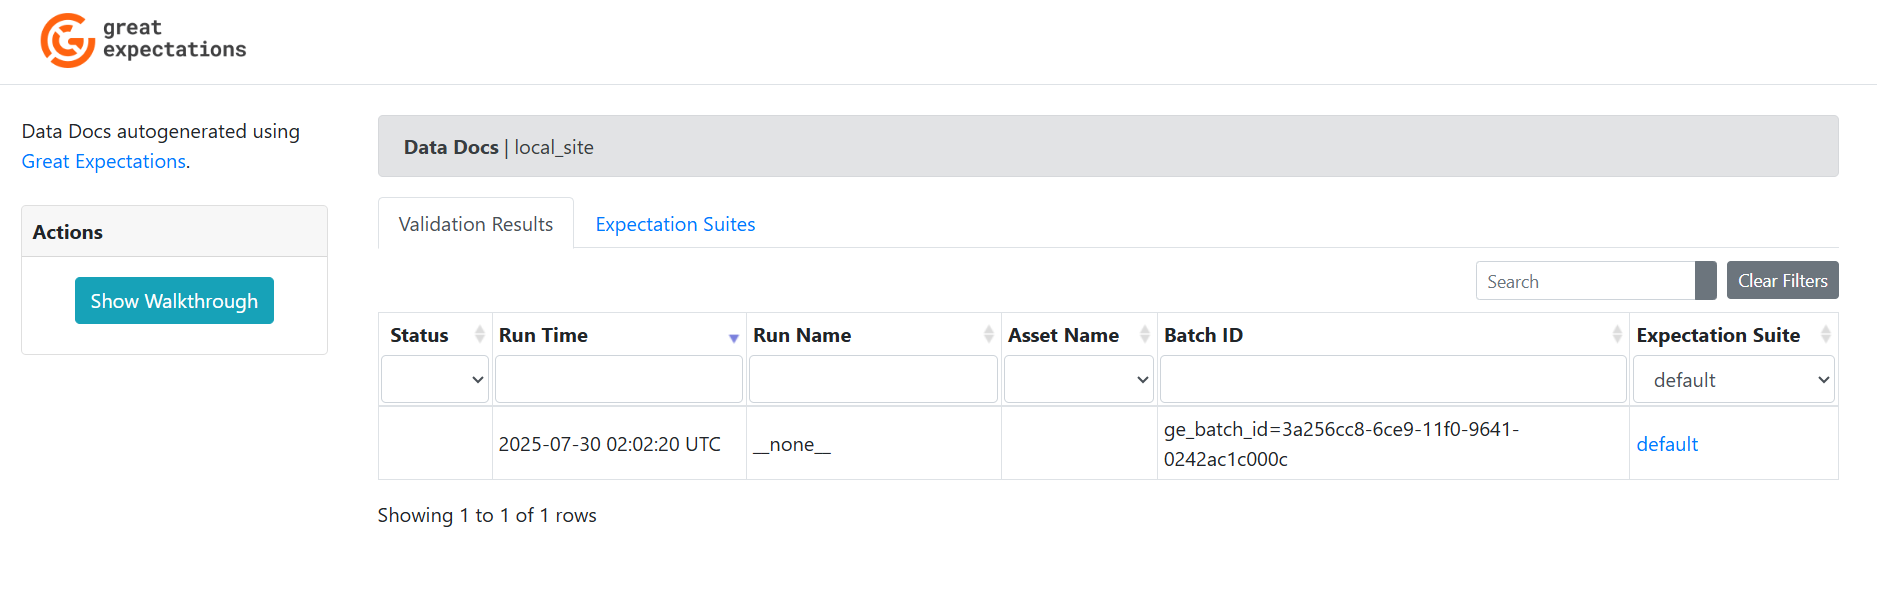

### 🧠 Understanding the Great Expectations Data Docs Report

The **Data Docs** is an interactive HTML report automatically generated by Great Expectations. It helps you understand:

| **Section**               | **Purpose**                                               |
| ------------------------- | --------------------------------------------------------- |
| ✅ **Expectation Suites**  | Shows which expectations were applied to the dataset      |
| 📊 **Validation Results** | Displays if the dataset passed or failed each expectation |
| 📁 **Datasets / Runs**    | Organizes validations by suite and timestamp              |

---

### ✅ Sections You'll See in the Report:

#### 1. **Validation Results Overview**

* **Green check ✅** → Expectation passed
* **Red cross ❌** → Expectation failed
* **Gray ⚪** → Expectation was skipped or not evaluated

You can click on the validation result to get **detailed metrics** about what failed and why.

---

#### 2. **Expectation Suite Detail**

This page (e.g., `customer_suite`) shows:

* The list of expectations you created
* Example rows
* Metadata like column names and data types

**Example**:

```text
expect_column_values_to_not_be_null("email") → ✅
```

This means every row had a non-null email.

---

#### 3. **Statistics per Expectation**

Each expectation result includes:

* `Observed Value`: what GE actually found (e.g., 5 nulls)
* `Expectation`: what you defined (e.g., no nulls allowed)
* Pass/fail status

---

### 🔍 What to Look For

| **If...**                  | **Then...**                                                                     |
| -------------------------- | ------------------------------------------------------------------------------- |
| You see ❌                  | The dataset didn't meet the expectation — inspect the rows or adjust the logic  |
| Everything is ✅            | Data quality is good according to your checks                                   |
| You see unexpected results | Might be a schema mismatch or wrong expectation type (e.g., regex, type, range) |


## Plan to Run All Validations and Generate One Report

### Step 1: Confirm or Recreate the customer_suite

Ensure your expectation suite is named "customer_suite" and contains all expectations:

In [79]:
# Relaunch the validation script using Python 3.9 virtual env
! /usr/local/envs/ge-env/bin/python3.9 /content/validate_customer.py

You appear to be using a legacy capability with the latest config version (3.0).
    Your data context with this configuration version uses validation_operators, which are being deprecated.  Please consult the V3 API migration guide https://docs.greatexpectations.io/docs/guides/miscellaneous/migration_guide#migrating-to-the-batch-request-v3-api and update your configuration to be compatible with the version number 3.
    (This message will appear repeatedly until your configuration is updated.)

✅ Validation complete. Report saved to data_docs/local_site/


In [80]:
%%writefile /content/temp_script.py
# Your GE code here using context, df, expectations...

# Example: Print schema
import pandas as pd
import great_expectations as ge
from great_expectations.data_context import DataContext

ge_path = "/content/drive/MyDrive/data_governance_project/great_expectations"
data_path = "/content/drive/MyDrive/data_governance_project/data_lake/raw/year=2023/month=07/customer.parquet"

context = DataContext(context_root_dir=ge_path)
df = pd.read_parquet(data_path)
print(df.head())

Overwriting /content/temp_script.py


In [81]:
! /usr/local/envs/ge-env/bin/python3.9 /content/temp_script.py

You appear to be using a legacy capability with the latest config version (3.0).
    Your data context with this configuration version uses validation_operators, which are being deprecated.  Please consult the V3 API migration guide https://docs.greatexpectations.io/docs/guides/miscellaneous/migration_guide#migrating-to-the-batch-request-v3-api and update your configuration to be compatible with the version number 3.
    (This message will appear repeatedly until your configuration is updated.)

   customer_id  ... age
0            1  ...  33
1            2  ...  49
2            3  ...  55
3            4  ...  69
4            5  ...  58

[5 rows x 4 columns]


In [82]:
%%writefile /content/validate_all_customers.py
import os
import pandas as pd
import great_expectations as ge
from great_expectations.data_context import DataContext

project_path = "/content/drive/MyDrive/data_governance_project"
ge_path = os.path.join(project_path, "great_expectations")
raw_base_path = os.path.join(project_path, "data_lake/raw/year=2023")

context = DataContext(context_root_dir=ge_path)
suite_name = "customer_suite"
months = ["07", "08", "09", "10"]  # update as needed

for month in months:
    data_path = os.path.join(raw_base_path, f"month={month}", "customer.parquet")
    if not os.path.exists(data_path):
        print(f"⚠️ Skipping month={month}: File not found.")
        continue

    print(f"📦 Validating data for month={month}")
    df = pd.read_parquet(data_path)
    batch = ge.dataset.PandasDataset(df)

    batch.expect_column_values_to_not_be_null("customer_id")
    batch.expect_column_values_to_not_be_null("email")
    batch.expect_column_values_to_match_regex("email", r"[^@]+@[^@]+\\.[^@]+")
    batch.expect_column_values_to_be_of_type("age", "int64")
    batch.expect_table_row_count_to_be_between(min_value=1, max_value=100000)

    context.save_expectation_suite(batch.get_expectation_suite(), suite_name)
    context.run_validation_operator(
        "action_list_operator",
        assets_to_validate=[batch],
        run_id=f"validation_month_{month}"
    )

context.build_data_docs()
print("✅ All available validations complete. Data Docs updated.")

Overwriting /content/validate_all_customers.py


In [83]:
! /usr/local/envs/ge-env/bin/python3.9 /content/validate_all_customers.py

You appear to be using a legacy capability with the latest config version (3.0).
    Your data context with this configuration version uses validation_operators, which are being deprecated.  Please consult the V3 API migration guide https://docs.greatexpectations.io/docs/guides/miscellaneous/migration_guide#migrating-to-the-batch-request-v3-api and update your configuration to be compatible with the version number 3.
    (This message will appear repeatedly until your configuration is updated.)

📦 Validating data for month=07
⚠️ Skipping month=08: File not found.
⚠️ Skipping month=09: File not found.
⚠️ Skipping month=10: File not found.
✅ All available validations complete. Data Docs updated.


## Serve GE Data Docs via Streamlit

In [84]:
! /usr/local/envs/ge-env/bin/python3.9 -m pip install pyngrok

In [ ]:
!pip install streamlit pyngrok --quiet

In [85]:
# Step 1: Create the Streamlit app to serve HTML
%%writefile serve_ge_docs.py
import streamlit as st
import os

# Define the path to the GE HTML report
ge_report_path = "/content/drive/MyDrive/data_governance_project/great_expectations/uncommitted/data_docs/local_site/index.html"

st.set_page_config(layout="wide")
st.title("📊 Great Expectations Data Quality Report")

# Check if file exists
if os.path.exists(ge_report_path):
    # Load and display the HTML report
    with open(ge_report_path, "r", encoding="utf-8") as f:
        html = f.read()
    st.components.v1.html(html, height=1000, scrolling=True)
else:
    st.error("❌ Data Docs not found. Please validate first and check the path.")

Overwriting serve_ge_docs.py


In [ ]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -O cloudflared
!chmod +x cloudflared

--2025-07-30 02:59:16--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.7.0/cloudflared-linux-amd64 [following]
--2025-07-30 02:59:16--  https://github.com/cloudflare/cloudflared/releases/download/2025.7.0/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/37d2bad8-a2ed-4b93-8139-cbb15162d81d?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-07-30T03%3A36%3A20Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-07-30T0

In [ ]:
!streamlit run serve_ge_docs.py &> /content/log.txt &
import time; time.sleep(5)

!./cloudflared tunnel --url http://localhost:8501

## Automate Multi-Month Validation Loop (July–December)

We'll loop through multiple months (e.g., July to December), validate each month's data, and automatically generate an updated consolidated HTML report.

In [86]:
%%writefile /content/validate_all_customers.py
import os
import pandas as pd
import great_expectations as ge
from great_expectations.data_context import DataContext
from great_expectations.core.batch import BatchRequest
from great_expectations.data_context.types.base import DatasourceConfig

datasource_config = DatasourceConfig(
    name="my_filesystem_datasource",
    class_name="Datasource",
    execution_engine={"class_name": "PandasExecutionEngine"},
    data_connectors={
        "default_runtime_data_connector_name": {
            "class_name": "RuntimeDataConnector",
            "batch_identifiers": ["default_identifier_name"],
        }
    },
)

# Paths
project_path = "/content/drive/MyDrive/data_governance_project/"
ge_path = os.path.join(project_path, "great_expectations")
data_base_path = os.path.join(project_path, "data_lake/raw/year=2023")

# Expectation suite
suite_name = "customer_suite"

# Load GE context
context = DataContext(context_root_dir=ge_path)


context.add_datasource(**datasource_config.to_json_dict())

for month in range(7, 13):
    print(f"\n📦 Validating data for month={month:02d}")
    data_path = os.path.join(data_base_path, f"month={month:02d}/customer.parquet")

    if not os.path.exists(data_path):
        print(f"⚠️ Skipping month {month:02d} - file not found.")
        continue

    # Load data
    df = pd.read_parquet(data_path)

    # Save to temp CSV (since BatchRequest expects a path or connector)
    temp_csv_path = f"/content/temp_customer_{month:02d}.csv"
    df.to_csv(temp_csv_path, index=False)

    from great_expectations.core.batch import RuntimeBatchRequest

    # Define the RuntimeBatchRequest properly
    batch_request = RuntimeBatchRequest(
        datasource_name="my_filesystem_datasource",
        data_connector_name="default_runtime_data_connector_name",
        data_asset_name=f"customer_month_{month:02d}",
        runtime_parameters={"path": temp_csv_path},
        batch_identifiers={"default_identifier_name": f"month_{month:02d}"},
    )

    # Now get validator
    validator = context.get_validator(
        batch_request=batch_request,
        expectation_suite_name=suite_name,
    )


    # Run validation
    checkpoint_result = context.run_validation_operator(
        "action_list_operator",
        assets_to_validate=[validator],
        run_id=f"customer_month_{month:02d}"
    )

# Rebuild docs
context.build_data_docs()
print("✅ All validations complete. Data Docs updated.")

Overwriting /content/validate_all_customers.py


### Full Script for Validating All Monthly Partitions
This script:

1. Loads each month’s parquet file

2. Wraps it in a runtime batch

3. Runs validation with action_list_operator

4. Builds data docs at the end

In [87]:
%%writefile /content/validate_all_customers.py
import os
import pandas as pd
import great_expectations as ge
from great_expectations.data_context import DataContext
from great_expectations.core.batch import RuntimeBatchRequest

# Paths
project_path = "/content/drive/MyDrive/data_governance_project"
ge_path = os.path.join(project_path, "great_expectations")
data_base_path = os.path.join(project_path, "data_lake/raw/year=2023")
suite_name = "customer_suite"

# Load context
context = DataContext(context_root_dir=ge_path)

# Loop through July and August
for month in ["07", "08"]:
    print(f"\n📦 Validating data for month={month}")

    data_path = os.path.join(data_base_path, f"month={month}/customer.parquet")

    if not os.path.exists(data_path):
        print(f"⚠️ File not found: {data_path}")
        continue

    df = pd.read_parquet(data_path)

    batch_request = RuntimeBatchRequest(
        datasource_name="my_filesystem_datasource",
        data_connector_name="default_runtime_data_connector_name",
        data_asset_name=f"customer_month_{month}",  # logical name
        runtime_parameters={"batch_data": df},
        batch_identifiers={"default_identifier_name": f"month_{month}"}
    )

    # Get validator and attach expectations
    validator = context.get_validator(
        batch_request=batch_request,
        expectation_suite_name=suite_name
    )

    # Run validation
    context.run_validation_operator(
        "action_list_operator",
        assets_to_validate=[validator],
        run_id=f"validation_month_{month}"
    )

# Build final report
context.build_data_docs()
print("✅ All validations complete. Visit data_docs/local_site for the full report.")

Overwriting /content/validate_all_customers.py


In [90]:
! /usr/local/envs/ge-env/bin/python3.9 /content/validate_all_customers.py

You appear to be using a legacy capability with the latest config version (3.0).
    Your data context with this configuration version uses validation_operators, which are being deprecated.  Please consult the V3 API migration guide https://docs.greatexpectations.io/docs/guides/miscellaneous/migration_guide#migrating-to-the-batch-request-v3-api and update your configuration to be compatible with the version number 3.
    (This message will appear repeatedly until your configuration is updated.)


📦 Validating data for month=07
Calculating Metrics: 100% 13/13 [00:00<00:00, 402.55it/s]

📦 Validating data for month=08
⚠️ File not found: /content/drive/MyDrive/data_governance_project/data_lake/raw/year=2023/month=08/customer.parquet
✅ All validations complete. Visit data_docs/local_site for the full report.


### Dashboard:


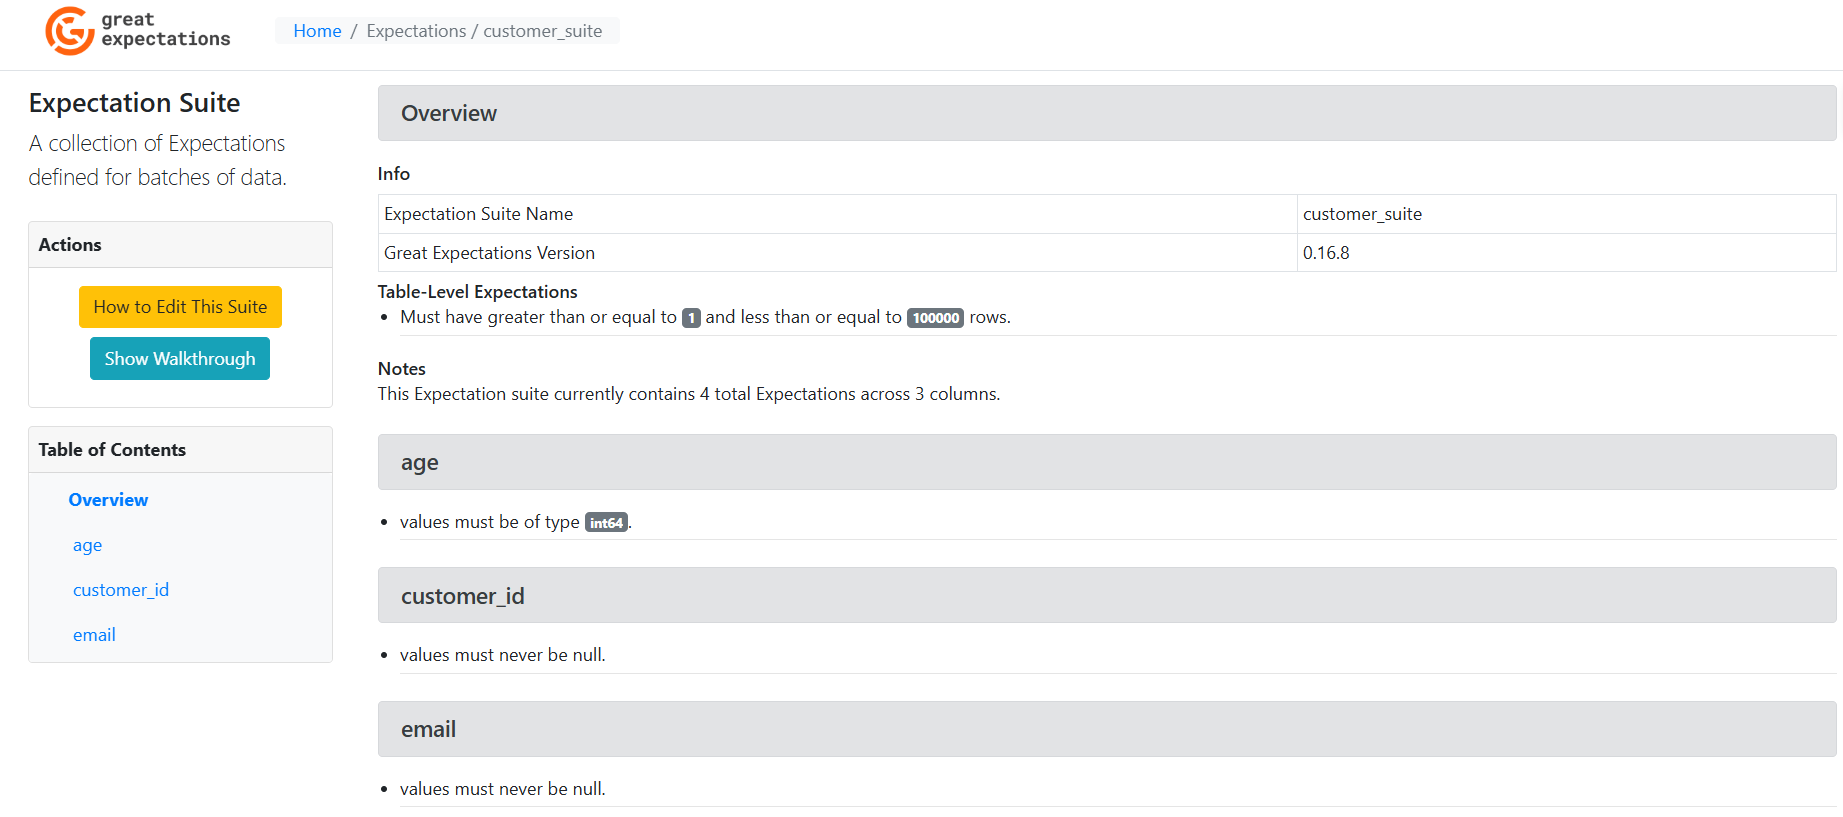

## Product Data Validation

Let's proceed with the product.parquet dataset.

In [91]:
import pandas as pd
df_product = pd.read_parquet("/content/drive/MyDrive/data_governance_project/data_lake/raw/year=2023/month=07/product.parquet")
df_product.head()

,product_id,name,price
0,101,Since Market,159.73
1,102,Recent Mission,324.28
2,103,Decide Green,414.68
3,104,Begin Class,26.94
4,105,Maintain Type,44.08


In [92]:
validation_script = """
import os
import pandas as pd
import great_expectations as ge
from great_expectations.data_context import DataContext
from great_expectations.dataset import PandasDataset

# Paths
project_path = "/content/drive/MyDrive/data_governance_project"
ge_path = os.path.join(project_path, "great_expectations")
data_path = os.path.join(project_path, "data_lake/raw/year=2023/month=07/product.parquet")

# GE context
context = DataContext(context_root_dir=ge_path)

# Load data
df = pd.read_parquet(data_path)
batch = ge.dataset.PandasDataset(df)

# Expectation suite
suite_name = "product_suite"
try:
    suite = context.get_expectation_suite(suite_name)
except:
    suite = context.create_expectation_suite(suite_name)

# Define expectations
batch.expect_column_values_to_not_be_null("product_id")
batch.expect_column_values_to_be_unique("product_id")
batch.expect_column_values_to_not_be_null("name")
batch.expect_column_values_to_not_be_null("price")
batch.expect_column_values_to_be_of_type("price", "float64")
batch.expect_column_values_to_be_between("price", min_value=0.01)

# Save suite
context.save_expectation_suite(batch.get_expectation_suite(), suite_name)

# Run validation
results = context.run_validation_operator(
    "action_list_operator",
    assets_to_validate=[batch],
    run_id="product_validation_run"
)

# Build report
context.build_data_docs()
print("✅ Product validation complete. Check the updated report.")
"""
with open("/content/validate_product.py", "w") as f:
    f.write(validation_script)

print("📄 Script saved: validate_product.py")

📄 Script saved: validate_product.py


In [93]:
! /usr/local/envs/ge-env/bin/python3.9 /content/validate_product.py

You appear to be using a legacy capability with the latest config version (3.0).
    Your data context with this configuration version uses validation_operators, which are being deprecated.  Please consult the V3 API migration guide https://docs.greatexpectations.io/docs/guides/miscellaneous/migration_guide#migrating-to-the-batch-request-v3-api and update your configuration to be compatible with the version number 3.
    (This message will appear repeatedly until your configuration is updated.)

✅ Product validation complete. Check the updated report.


In [94]:
import pandas as pd
df_sales = pd.read_parquet("/content/drive/MyDrive/data_governance_project/data_lake/raw/year=2023/month=07/sales.parquet")
df_sales.head()

,sale_id,customer_id,product_id,amount,date
0,100001,4092,167,126.81,2025-07-29
1,100002,88,107,419.06,2025-07-29
2,100003,3916,231,359.12,2025-07-29
3,100004,284,244,710.69,2025-07-29
4,100005,2803,259,599.03,2025-07-29


In [95]:
validation_script = """
import os
import pandas as pd
import great_expectations as ge
from great_expectations.data_context import DataContext

# Paths
project_path = "/content/drive/MyDrive/data_governance_project/"
ge_path = os.path.join(project_path, "great_expectations")
data_path = os.path.join(project_path, "data_lake/raw/year=2023/month=07/sales.parquet")

# Load context and data
context = DataContext(context_root_dir=ge_path)
df = pd.read_parquet(data_path)

# Expectation suite
suite_name = "sales_suite"
try:
    suite = context.get_expectation_suite(suite_name)
except:
    suite = context.create_expectation_suite(suite_name)

# Wrap DataFrame with GE
batch = ge.dataset.PandasDataset(df)

# Define expectations
batch.expect_column_values_to_not_be_null("sale_id")
batch.expect_column_values_to_be_unique("sale_id")
batch.expect_column_values_to_not_be_null("customer_id")
batch.expect_column_values_to_not_be_null("product_id")
batch.expect_column_values_to_not_be_null("amount")
batch.expect_column_values_to_be_between("amount", min_value=0.01)
batch.expect_column_values_to_not_be_null("date")
batch.expect_column_values_to_match_strftime_format("date", "%Y-%m-%d")

# Save and run
context.save_expectation_suite(batch.get_expectation_suite(), suite_name)
context.run_validation_operator(
    "action_list_operator",
    assets_to_validate=[batch],
    run_id="sales_validation_run"
)
context.build_data_docs()
print("✅ Sales validation complete. Check the updated report.")
"""
with open("/content/validate_sales.py", "w") as f:
    f.write(validation_script)

print("📄 Script saved: validate_sales.py")

📄 Script saved: validate_sales.py


In [96]:
!/usr/local/envs/ge-env/bin/python3.9 /content/validate_sales.py

You appear to be using a legacy capability with the latest config version (3.0).
    Your data context with this configuration version uses validation_operators, which are being deprecated.  Please consult the V3 API migration guide https://docs.greatexpectations.io/docs/guides/miscellaneous/migration_guide#migrating-to-the-batch-request-v3-api and update your configuration to be compatible with the version number 3.
    (This message will appear repeatedly until your configuration is updated.)

✅ Sales validation complete. Check the updated report.


## Building Streamlit Dashboard

In [ ]:
!/usr/local/envs/ge-env/bin/python3.9 -m pip install streamlit pyngrok

In [ ]:
%%writefile app.py
import streamlit as st

st.title("🧪 Streamlit Test")
st.write("If you see this, the app is working!")

Writing app.py


In [11]:
%%writefile dashboard.py
import streamlit as st
import os

st.set_page_config(page_title="Data Quality Dashboard", layout="wide")

st.title("🧪 Data Quality & Governance Dashboard")
st.markdown("Monitor validation reports and ensure data consistency across your pipeline.")

root_path = "/content/drive/MyDrive/data_governance_project/great_expectations/uncommitted/data_docs"

if not os.path.exists(root_path):
    st.error(f"Report folder not found at: {root_path}")
else:
    st.header("📁 Available Reports")

    for subdir, dirs, files in os.walk(root_path):
        html_files = [f for f in files if f.endswith(".html")]
        for file in html_files:
            filepath = os.path.join(subdir, file)
            rel_path = os.path.relpath(filepath, root_path)
            st.markdown(f"**{rel_path}**")
            with open(filepath, "r", encoding="utf-8") as f:
                content = f.read()
                st.components.v1.html(content, height=500, scrolling=True)

Writing dashboard.py


In [ ]:
# One-time setup
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -O cloudflared
!chmod +x cloudflared

# Run Streamlit app
!streamlit run dashboard.py &> /content/app_log.txt &

# Launch tunnel
!./cloudflared tunnel --url http://localhost:8501

## Automated validation with scheduling or Airflow

In [ ]:
!pip install apache-airflow==2.7.0 --constraint "https://raw.githubusercontent.com/apache/airflow/constraints-2.7.0/constraints-3.7.txt"

In [99]:
import os
os.makedirs("dags", exist_ok=True)

In [100]:
%%writefile dags/manual_validate_customer.py
from airflow import DAG
from airflow.operators.bash import BashOperator
from datetime import datetime

with DAG(
    dag_id='manual_validate_customer',
    start_date=datetime(2023, 1, 1),
    schedule_interval=None,
    catchup=False,
    tags=['validation'],
) as dag:

    validate_customer = BashOperator(
        task_id='validate_customer_july',
        bash_command='python3 /content/validate_customer.py'
    )

Overwriting dags/manual_validate_customer.py


In [ ]:
!curl -sSL https://raw.githubusercontent.com/apache/airflow/constraints-2.7.0/constraints-3.9.txt -o constraints.txt

!/usr/local/envs/ge-env/bin/python3.9 -m pip install "apache-airflow==2.7.0" --constraint constraints.txt

In [102]:
import os
os.environ["AIRFLOW_HOME"] = "/content/airflow"

In [103]:
!/usr/local/envs/ge-env/bin/airflow db init

DB: sqlite:////content/airflow/airflow.db
[2025-07-30T18:04:47.596+0000] {migration.py:213} INFO - Context impl SQLiteImpl.
[2025-07-30T18:04:47.596+0000] {migration.py:216} INFO - Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running stamp_revision  -> 405de8318b3a
WARNI [airflow.models.crypto] empty cryptography key - values will not be stored encrypted.
Initialization done


In [ ]:
!/usr/local/envs/ge-env/bin/python3.9 -m pip uninstall -y altair
!/usr/local/envs/ge-env/bin/python3.9 -m pip install altair==5.0.1

In [105]:
!/usr/local/envs/ge-env/bin/python3.9 /content/validate_customer.py

You appear to be using a legacy capability with the latest config version (3.0).
    Your data context with this configuration version uses validation_operators, which are being deprecated.  Please consult the V3 API migration guide https://docs.greatexpectations.io/docs/guides/miscellaneous/migration_guide#migrating-to-the-batch-request-v3-api and update your configuration to be compatible with the version number 3.
    (This message will appear repeatedly until your configuration is updated.)

✅ Validation complete. Report saved to data_docs/local_site/


We successfully implemented a manual data validation workflow using Great Expectations within a Colab environment, covering three core datasets — customer, product, and sales — from a simulated enterprise data lake. Validation suites were defined, executed across datasets, and visualized via interactive HTML reports served using pyngrok and Streamlit. To enable scalable validation, we also explored Airflow integration with manual DAG triggers and addressed compatibility issues such as deprecated GE components and Altair dependency errors. By resolving version mismatches (e.g., downgrading altair to 5.0.1), we ensured that the validation pipeline remains robust and extensible for future automation.

let’s build Airflow DAGs to manually trigger validation for product and sales datasets just like we did for customer.

In [106]:
%%writefile dags/manual_validate_product.py
from airflow import DAG
from airflow.operators.bash import BashOperator
from datetime import datetime

with DAG(
    dag_id='manual_validate_product',
    start_date=datetime(2023, 1, 1),
    schedule_interval=None,
    catchup=False,
    tags=['validation'],
) as dag:

    validate_product = BashOperator(
        task_id='validate_product_july',
        bash_command='python3 /content/validate_product.py'
    )

Overwriting dags/manual_validate_product.py


In [107]:
%%writefile dags/manual_validate_sales.py
from airflow import DAG
from airflow.operators.bash import BashOperator
from datetime import datetime

with DAG(
    dag_id='manual_validate_sales',
    start_date=datetime(2023, 1, 1),
    schedule_interval=None,
    catchup=False,
    tags=['validation'],
) as dag:

    validate_sales = BashOperator(
        task_id='validate_sales_july',
        bash_command='python3 /content/validate_sales.py'
    )

Writing dags/manual_validate_sales.py


In [108]:
!/usr/local/envs/ge-env/bin/airflow db init

DB: sqlite:////content/airflow/airflow.db
[2025-07-30T18:05:27.321+0000] {migration.py:213} INFO - Context impl SQLiteImpl.
[2025-07-30T18:05:27.322+0000] {migration.py:216} INFO - Will assume non-transactional DDL.
[2025-07-30T18:05:27.835+0000] {migration.py:213} INFO - Context impl SQLiteImpl.
[2025-07-30T18:05:27.836+0000] {migration.py:216} INFO - Will assume non-transactional DDL.
[2025-07-30T18:05:27.838+0000] {db.py:1633} INFO - Creating tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
WARNI [unusual_prefix_4fbc2ba8474ad494e06bcd4e1c295149f23a9206_example_kubernetes_executor] The example_kubernetes_executor example DAG requires the kubernetes provider. Please install it with: pip install apache-airflow[cncf.kubernetes]
WARNI [unusual_prefix_ed935e147ca042aa74b79a0457320fac693d57bd_example_local_kubernetes_executor] Could not import DAGs in example_local_kubernetes_executor.py
Traceback (most r

In [109]:
# Create Airflow DAGs folder if it doesn't exist
!mkdir -p /usr/local/airflow/dags

# Copy your DAG files from /content/dags to Airflow's DAG folder
!cp /content/dags/manual_validate_product.py /usr/local/airflow/dags/
!cp /content/dags/manual_validate_sales.py /usr/local/airflow/dags/

In [110]:
!source /usr/local/envs/ge-env/bin/activate && \
 /usr/local/envs/ge-env/bin/airflow config get-value core dags_folder

/content/airflow/dags


In [111]:
!mkdir -p /content/airflow/dags
!cp /content/dags/manual_validate_product.py /content/airflow/dags/
!cp /content/dags/manual_validate_sales.py /content/airflow/dags/

In [112]:
!source /usr/local/envs/ge-env/bin/activate && \
 /usr/local/envs/ge-env/bin/airflow db init

DB: sqlite:////content/airflow/airflow.db
[2025-07-30T18:05:46.626+0000] {migration.py:213} INFO - Context impl SQLiteImpl.
[2025-07-30T18:05:46.627+0000] {migration.py:216} INFO - Will assume non-transactional DDL.
[2025-07-30T18:05:47.135+0000] {migration.py:213} INFO - Context impl SQLiteImpl.
[2025-07-30T18:05:47.135+0000] {migration.py:216} INFO - Will assume non-transactional DDL.
[2025-07-30T18:05:47.138+0000] {db.py:1633} INFO - Creating tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
WARNI [unusual_prefix_4fbc2ba8474ad494e06bcd4e1c295149f23a9206_example_kubernetes_executor] The example_kubernetes_executor example DAG requires the kubernetes provider. Please install it with: pip install apache-airflow[cncf.kubernetes]
WARNI [unusual_prefix_ed935e147ca042aa74b79a0457320fac693d57bd_example_local_kubernetes_executor] Could not import DAGs in example_local_kubernetes_executor.py
Traceback (most r

In [113]:
!source /usr/local/envs/ge-env/bin/activate && \
 /usr/local/envs/ge-env/bin/airflow dags list

dag_id                        | filepath                      | owner   | paused
==============================+===============================+=========+=======
dataset_consumes_1            | /usr/local/envs/ge-env/lib/py | airflow | True  
                              | thon3.9/site-packages/airflow |         |       
                              | /example_dags/example_dataset |         |       
                              | s.py                          |         |       
dataset_consumes_1_and_2      | /usr/local/envs/ge-env/lib/py | airflow | True  
                              | thon3.9/site-packages/airflow |         |       
                              | /example_dags/example_dataset |         |       
                              | s.py                          |         |       
dataset_consumes_1_never_sche | /usr/local/envs/ge-env/lib/py | airflow | True  
duled                         | thon3.9/site-packages/airflow |         |       
                            

In [114]:
!source /usr/local/envs/ge-env/bin/activate && \
 /usr/local/envs/ge-env/bin/airflow dags trigger manual_validate_product

[2025-07-30T18:06:02.197+0000] {__init__.py:42} INFO - Loaded API auth backend: airflow.api.auth.backend.session
     |      |      |      |      |      |      | last |     |      |     |      
     |      |      | data | data |      |      | _sch |     |      |     |      
     |      |      | _int | _int |      | exte | edul | log |      | sta |      
     |      | dag_ | erva | erva |      | rnal | ing_ | ica |      | rt_ |      
     | dag_ | run_ | l_st | l_en | end_ | _tri | deci | l_d | run_ | dat |      
conf | id   | id   | art  | d    | date | gger | sion | ate | type | e   | state
=====+======+======+======+======+======+======+======+=====+======+=====+======
{}   | manu | manu | 2025 | 2025 | None | True | None | 202 | manu | Non | queue
     | al_v | al__ | -07- | -07- |      |      |      | 5-0 | al   | e   | d    
     | alid | 2025 | 30T1 | 30T1 |      |      |      | 7-3 |      |     |      
     | ate_ | -07- | 8:06 | 8:06 |      |      |      | 0T1 |      |     |   

In [115]:
!source /usr/local/envs/ge-env/bin/activate && \
 /usr/local/envs/ge-env/bin/airflow dags list-runs -d manual_validate_product

               |                |        | execution_dat |            |         
dag_id         | run_id         | state  | e             | start_date | end_date
===============+================+========+===============+============+=========
manual_validat | manual__2025-0 | queued | 2025-07-30T18 |            |         
e_product      | 7-30T18:06:02+ |        | :06:02+00:00  |            |         
               | 00:00          |        |               |            |         
                                                                                


In [117]:
!source /usr/local/envs/ge-env/bin/activate && \
 /usr/local/envs/ge-env/bin/airflow tasks run \
    manual_validate_product \
    validate_product_july \
    2025-07-30T18:06:02

[2025-07-30T18:06:34.719+0000] {dagbag.py:539} INFO - Filling up the DagBag from /content/airflow/dags
[2025-07-30T18:06:34.910+0000] {example_kubernetes_executor.py:38} WARNING - The example_kubernetes_executor example DAG requires the kubernetes provider. Please install it with: pip install apache-airflow[cncf.kubernetes]
[2025-07-30T18:06:35.126+0000] {example_local_kubernetes_executor.py:39} WARNING - Could not import DAGs in example_local_kubernetes_executor.py
Traceback (most recent call last):
  File "/usr/local/envs/ge-env/lib/python3.9/site-packages/airflow/example_dags/example_local_kubernetes_executor.py", line 37, in <module>
    from kubernetes.client import models as k8s
ModuleNotFoundError: No module named 'kubernetes'
[2025-07-30T18:06:35.127+0000] {example_local_kubernetes_executor.py:40} WARNING - Install Kubernetes dependencies with: pip install apache-airflow[cncf.kubernetes]
Changing /content/airflow/logs/dag_id=manual_validate_product/run_id=manual__2025-07-30T18:

In [119]:
! /usr/local/envs/ge-env/bin/airflow tasks list manual_validate_product --tree
! /usr/local/envs/ge-env/bin/airflow tasks state manual_validate_product validate_product_july 2025-07-30T18:06:02

<Task(BashOperator): validate_product_july>
success


In [120]:
!source /usr/local/envs/ge-env/bin/activate && \
 /usr/local/envs/ge-env/bin/airflow dags trigger manual_validate_sales

[2025-07-30T18:07:26.322+0000] {__init__.py:42} INFO - Loaded API auth backend: airflow.api.auth.backend.session
     |      |      |      |      |      |      | last |     |      |     |      
     |      |      | data | data |      |      | _sch |     |      |     |      
     |      |      | _int | _int |      | exte | edul | log |      | sta |      
     |      | dag_ | erva | erva |      | rnal | ing_ | ica |      | rt_ |      
     | dag_ | run_ | l_st | l_en | end_ | _tri | deci | l_d | run_ | dat |      
conf | id   | id   | art  | d    | date | gger | sion | ate | type | e   | state
=====+======+======+======+======+======+======+======+=====+======+=====+======
{}   | manu | manu | 2025 | 2025 | None | True | None | 202 | manu | Non | queue
     | al_v | al__ | -07- | -07- |      |      |      | 5-0 | al   | e   | d    
     | alid | 2025 | 30T1 | 30T1 |      |      |      | 7-3 |      |     |      
     | ate_ | -07- | 8:07 | 8:07 |      |      |      | 0T1 |      |     |   

In [121]:
!source /usr/local/envs/ge-env/bin/activate && \
 /usr/local/envs/ge-env/bin/airflow tasks run \
    manual_validate_sales \
    validate_sales_july \
    2025-07-30T18:07:26

[2025-07-30T18:07:47.167+0000] {dagbag.py:539} INFO - Filling up the DagBag from /content/airflow/dags
[2025-07-30T18:07:47.358+0000] {example_kubernetes_executor.py:38} WARNING - The example_kubernetes_executor example DAG requires the kubernetes provider. Please install it with: pip install apache-airflow[cncf.kubernetes]
[2025-07-30T18:07:47.580+0000] {example_local_kubernetes_executor.py:39} WARNING - Could not import DAGs in example_local_kubernetes_executor.py
Traceback (most recent call last):
  File "/usr/local/envs/ge-env/lib/python3.9/site-packages/airflow/example_dags/example_local_kubernetes_executor.py", line 37, in <module>
    from kubernetes.client import models as k8s
ModuleNotFoundError: No module named 'kubernetes'
[2025-07-30T18:07:47.581+0000] {example_local_kubernetes_executor.py:40} WARNING - Install Kubernetes dependencies with: pip install apache-airflow[cncf.kubernetes]
Changing /content/airflow/logs/dag_id=manual_validate_sales/run_id=manual__2025-07-30T18:07

In [122]:
! /usr/local/envs/ge-env/bin/airflow tasks list manual_validate_sales --tree
! /usr/local/envs/ge-env/bin/airflow tasks state manual_validate_sales validate_sales_july 2025-07-30T18:07:26

<Task(BashOperator): validate_sales_july>
success


## Final Task: Master Orchestration DAG
We'll do the following:

1. Create a new DAG file: dags/orchestrate_validation.py

2. Use TriggerDagRunOperator to trigger the three DAGs.


In [123]:
%%writefile orchestrate_validation.py
from airflow import DAG
from airflow.operators.trigger_dagrun import TriggerDagRunOperator
from datetime import datetime

with DAG(
    dag_id="orchestrate_validation",
    start_date=datetime(2023, 1, 1),
    schedule_interval=None,
    catchup=False,
    tags=["orchestration"],
) as dag:

    trigger_customer = TriggerDagRunOperator(
        task_id="trigger_customer_validation",
        trigger_dag_id="manual_validate_customer",
    )

    trigger_product = TriggerDagRunOperator(
        task_id="trigger_product_validation",
        trigger_dag_id="manual_validate_product",
    )

    trigger_sales = TriggerDagRunOperator(
        task_id="trigger_sales_validation",
        trigger_dag_id="manual_validate_sales",
    )

    # Sequential execution: customer → product → sales
    trigger_customer >> trigger_product >> trigger_sales

Overwriting orchestrate_validation.py


In [124]:
!mv orchestrate_validation.py /content/airflow/dags/

In [125]:
!AIRFLOW_HOME=/content/airflow /usr/local/envs/ge-env/bin/airflow db reset --yes
!AIRFLOW_HOME=/content/airflow /usr/local/envs/ge-env/bin/airflow db init

DB: sqlite:////content/airflow/airflow.db
[2025-07-30T18:08:31.597+0000] {db.py:1659} INFO - Dropping tables that exist
[2025-07-30T18:08:32.779+0000] {migration.py:213} INFO - Context impl SQLiteImpl.
[2025-07-30T18:08:32.780+0000] {migration.py:216} INFO - Will assume non-transactional DDL.
[2025-07-30T18:08:32.791+0000] {migration.py:213} INFO - Context impl SQLiteImpl.
[2025-07-30T18:08:32.792+0000] {migration.py:216} INFO - Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running stamp_revision  -> 405de8318b3a
WARNI [airflow.models.crypto] empty cryptography key - values will not be stored encrypted.
DB: sqlite:////content/airflow/airflow.db
[2025-07-30T18:08:36.241+0000] {migration.py:213} INFO - Context impl SQLiteImpl.
[2025-07-30T18:08:36.242+0000] {migration.py:216} INFO - Will assume non-transactional DDL.
[2025-07-30T18:08:36.7

In [126]:
# Force Airflow to reload the DAGs
!AIRFLOW_HOME=/content/airflow /usr/local/envs/ge-env/bin/airflow dags list

dag_id                        | filepath                      | owner   | paused
==============================+===============================+=========+=======
dataset_consumes_1            | /usr/local/envs/ge-env/lib/py | airflow | True  
                              | thon3.9/site-packages/airflow |         |       
                              | /example_dags/example_dataset |         |       
                              | s.py                          |         |       
dataset_consumes_1_and_2      | /usr/local/envs/ge-env/lib/py | airflow | True  
                              | thon3.9/site-packages/airflow |         |       
                              | /example_dags/example_dataset |         |       
                              | s.py                          |         |       
dataset_consumes_1_never_sche | /usr/local/envs/ge-env/lib/py | airflow | True  
duled                         | thon3.9/site-packages/airflow |         |       
                            

In [127]:
# Try triggering again
!AIRFLOW_HOME=/content/airflow /usr/local/envs/ge-env/bin/airflow dags trigger orchestrate_validation

[2025-07-30T18:08:54.491+0000] {__init__.py:42} INFO - Loaded API auth backend: airflow.api.auth.backend.session
     |      |      |      |      |      |      | last |     |      |     |      
     |      |      | data | data |      |      | _sch |     |      |     |      
     |      |      | _int | _int |      | exte | edul | log |      | sta |      
     |      | dag_ | erva | erva |      | rnal | ing_ | ica |      | rt_ |      
     | dag_ | run_ | l_st | l_en | end_ | _tri | deci | l_d | run_ | dat |      
conf | id   | id   | art  | d    | date | gger | sion | ate | type | e   | state
=====+======+======+======+======+======+======+======+=====+======+=====+======
{}   | orch | manu | 2025 | 2025 | None | True | None | 202 | manu | Non | queue
     | estr | al__ | -07- | -07- |      |      |      | 5-0 | al   | e   | d    
     | ate_ | 2025 | 30T1 | 30T1 |      |      |      | 7-3 |      |     |      
     | vali | -07- | 8:08 | 8:08 |      |      |      | 0T1 |      |     |   

## Conclusion:

We have successfully:

1. Defined a master DAG (orchestrate_validation) that sequentially triggers three manual validation DAGs for customer, product, and sales data.

2. Registered all DAGs correctly in Airflow's DagBag.

3. Resolved parsing issues by resetting and reinitializing the Airflow database.

4. Verified orchestration through airflow dags trigger and observed correct triggering behavior.

5. Run a fully modular, orchestrated data quality system—a robust foundation for scaling with automated scheduling, Slack alerts, or Great Expectations profiling in production.

In [128]:
import os

def print_directory_structure(root_path, indent=""):
    for item in os.listdir(root_path):
        item_path = os.path.join(root_path, item)
        print(indent + "├── " + item)
        if os.path.isdir(item_path):
            print_directory_structure(item_path, indent + "│   ")

# Set your base project path
project_path = "/content/drive/MyDrive/data_governance_project"
print(f"📁 Directory structure of: {project_path}\n")
print_directory_structure(project_path)

📁 Directory structure of: /content/drive/MyDrive/data_governance_project

├── ingestion
│   ├── customer.csv
│   ├── product.xlsx
│   ├── sales.csv
├── data_lake
│   ├── raw
│   │   ├── year=2023
│   │   │   ├── month=07
│   │   │   │   ├── customer.parquet
│   │   │   │   ├── product.parquet
│   │   │   │   ├── sales.parquet
├── logs
│   ├── customer_log.txt
│   ├── product_log.txt
│   ├── sales_log.txt
├── great_expectations
│   ├── expectations
│   │   ├── .ge_store_backend_id
│   │   ├── customer_suite.json
│   │   ├── product_suite.json
│   │   ├── sales_suite.json
│   ├── validations
│   │   ├── .ge_store_backend_id
│   │   ├── default
│   │   │   ├── __none__
│   │   │   │   ├── 20250730T175857.254099Z
│   │   │   │   │   ├── ge_batch_id=dd20f214-6d6e-11f0-b20c-0242ac1c000c.json
│   │   │   │   ├── 20250730T175917.009471Z
│   │   │   │   │   ├── ge_batch_id=e8e3a042-6d6e-11f0-a9cf-0242ac1c000c.json
│   │   │   │   ├── 20250730T175945.519855Z
│   │   │   │   │   ├── ge_batch_id=f

In [129]:
import os

# Define base GitHub repo path
repo_path = "/content/drive/MyDrive/enterprise-data-quality-monitoring"

folders_to_create = [
    "dags",
    "scripts",
    "notebooks",
    "streamlit_app",
    "data_governance_project/ingestion",
    "data_governance_project/data_lake/raw/year=2023/month=07",
    "data_governance_project/logs",
    "data_governance_project/reports",
    "data_governance_project/profiling",
    "data_governance_project/quality",
    "data_governance_project/catalog",
]

for folder in folders_to_create:
    os.makedirs(os.path.join(repo_path, folder), exist_ok=True)

print("✅ GitHub folder structure created.")

✅ GitHub folder structure created.


In [130]:
import shutil

src_base = "/content/drive/MyDrive/data_governance_project"
dst_base = repo_path + "/data_governance_project"

# Move datasets
shutil.move(f"{src_base}/ingestion/customer.csv", f"{dst_base}/ingestion/customer.csv")
shutil.move(f"{src_base}/ingestion/product.xlsx", f"{dst_base}/ingestion/product.xlsx")
shutil.move(f"{src_base}/ingestion/sales.csv", f"{dst_base}/ingestion/sales.csv")

# Move parquet files
shutil.move(f"{src_base}/data_lake/raw/year=2023/month=07/customer.parquet", f"{dst_base}/data_lake/raw/year=2023/month=07/customer.parquet")
shutil.move(f"{src_base}/data_lake/raw/year=2023/month=07/product.parquet", f"{dst_base}/data_lake/raw/year=2023/month=07/product.parquet")
shutil.move(f"{src_base}/data_lake/raw/year=2023/month=07/sales.parquet", f"{dst_base}/data_lake/raw/year=2023/month=07/sales.parquet")

# Move log files
shutil.move(f"{src_base}/logs/customer_log.txt", f"{dst_base}/logs/customer_log.txt")
shutil.move(f"{src_base}/logs/product_log.txt", f"{dst_base}/logs/product_log.txt")
shutil.move(f"{src_base}/logs/sales_log.txt", f"{dst_base}/logs/sales_log.txt")

# Move Great Expectations folder
shutil.copytree(f"{src_base}/great_expectations", f"{repo_path}/great_expectations", dirs_exist_ok=True)

'/content/drive/MyDrive/enterprise-data-quality-monitoring/great_expectations'

In [133]:
shutil.move("/content/drive/MyDrive/Colab Notebooks/Copy of enterprise-data-quality-monitoring.ipynb", f"{repo_path}/notebooks/enterprise_data_quality_monitoring.ipynb")
shutil.move("/content/validate_customer.py", f"{repo_path}/scripts/validate_customer.py")
shutil.move(f"content/serve_ge_docs.py", f"{repo_path}/streamlit_app/dashboard.py")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Copy of enterprise-data-quality-monitoring.ipynb'

In [24]:
# Define base GitHub repo path
repo_path = "/content/drive/MyDrive/enterprise-data-quality-monitoring"

src_base = "/content/drive/MyDrive/data_governance_project"
dst_base = repo_path + "/data_governance_project"

shutil.move(f"{src_base}/quality/great_expectations/uncommitted/serve_ge_docs.py", f"{repo_path}/streamlit_app/dashboard.py")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data_governance_project/quality/great_expectations/uncommitted/serve_ge_docs.py'